<a href="https://colab.research.google.com/github/DheniMoura/Python-para-Ciencia-de-Dados/blob/main/Python_para_ci%C3%AAncia_de_dados_parte_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MODELOS DE APRENDIZADO

## Regressão linear

É um método estatístico de machine learning que pode ser utilizado para quantificar e fazer predições com base em relacionamentos numéricos entre variáveis. Esse método ajuda a prever o valor de uma observação baseado num target e em variáveis independentes linearmente relacionadas.
- Tipos:
  - Regressão linear simples: um preditor e um predito
  - Regressão linear múltipla: múltiplos preditores e um predito

- Casos de uso:
  - Predição de vendas
  - Predição de consumo de recursos
  - Predição de custo de suprimentos
  - Predição de ciclo de vida de serviços de telecomunicações, entre outros

- Pressupostos
  - Todas as variáveis são contínuas, numéricas, não categóricas
  - O conjunto de dados não apresenta outliers ou valores em branco
  - Existe uma relação linear entre os preditores e o predito
  - Todos os preditores são independentes
  - Residuais (ou erros de predição) têm distribuição normal

Exemplo de aplicação:

O dataset contém informações sobre as inscrições num curso em uma faculdade e ele foi utilizado para fazer a predição de quantos inscritos são previstos para o próximo ano.

Neste daaset há cinco variáveis: ano (de 1961 a 1989)(year), quantidade de inscritos no outono(roll), taxa de desemprego na localidade da faculdade(unem), quantidade de formados no ano anterior(hgrad), renda percapita da cidade onde a faculdade é localizada(inc)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import rcParams
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale

In [ ]:
%matplotlib inline
rcParams['figure.figsize'] = 5,4
sns.set_style('whitegrid')

caminho = '/content/enrollment_forecast.csv'
inscritos = pd.read_csv(caminho)
inscritos.columns = ['year', 'roll', 'unem', 'hgrad', 'inc']

### Regressão linear nos dados de inscrição

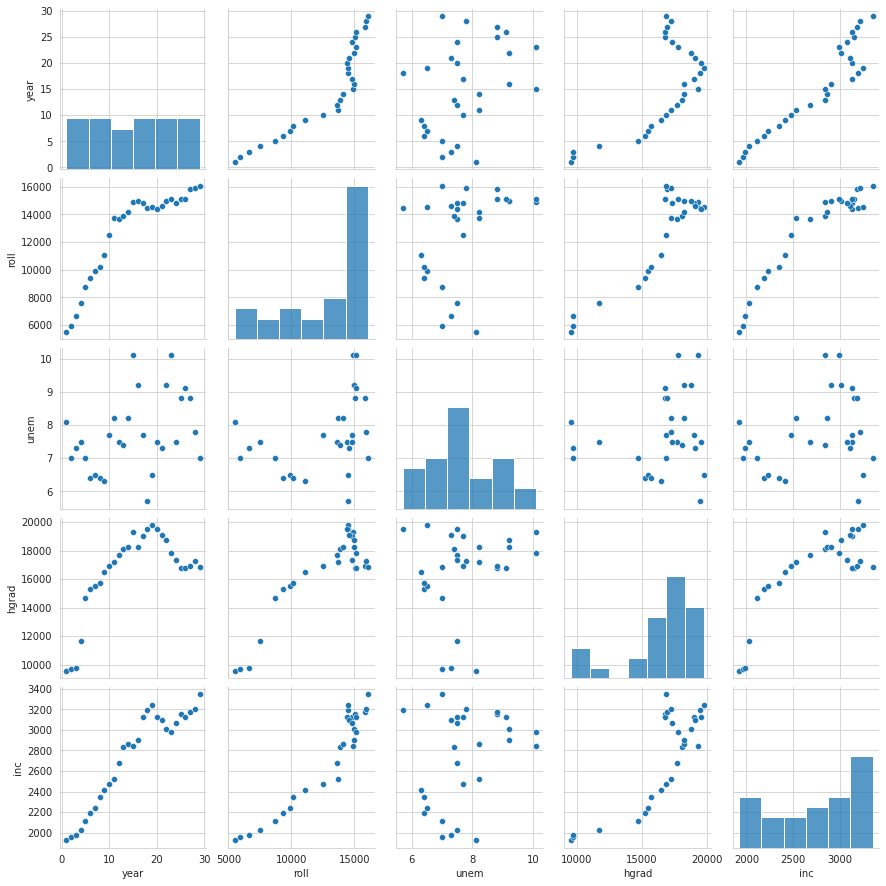

In [ ]:
# veriicar se há relação linear entre as variáveis, e se são contínuas
sns.pairplot(inscritos)

In [ ]:
print(inscritos.corr())
# quantidade de inscritos x taxa de desemprego -> correlação bem baixa, utilizar para fazer a correlação linear

           year      roll      unem     hgrad       inc
year   1.000000  0.900934  0.378305  0.670300  0.944287
roll   0.900934  1.000000  0.391344  0.890294  0.949876
unem   0.378305  0.391344  1.000000  0.177376  0.282310
hgrad  0.670300  0.890294  0.177376  1.000000  0.820089
inc    0.944287  0.949876  0.282310  0.820089  1.000000


In [ ]:
inscritos_cols = ['unem', 'hgrad']
inscritos_data = inscritos[inscritos_cols].values

#na variável target -> n° de inscritos até então
inscritos_target = inscritos['roll'].values

x,y = scale(inscritos_data), inscritos_target

### Conferindo se hṕa valores nulos

In [ ]:
em_branco = x == np.NAN
x[em_branco == True]

# obter um array vazio significa que não há valor nulo no universo observado

array([], dtype=float64)

In [ ]:
# aplicando a regressão linear
lin_reg = LinearRegression(normalize=True)
lin_reg.fit(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


LinearRegression(normalize=True)

In [ ]:
print(lin_reg.score(x, y)) # quanto mais alto melhor (entre 0 e 1)

0.8488812666133723


## Regressão Logística

Regressão logística é um método de machine learning que pode ser usado para predizer o valor de uma variável categórica numérica baseando-se no relacionamento dessa variável com as variáveis preditoras. Ou seja, podemos predizer a categoria de uma observação.

**Casos de uso:**
- Análise de propensão de vendas *versus* gastos com propaganda
- Predição de rotatividades de clientes
- Predição de eventos perigosos

**Pressupostos:**
- O conjunto de dados não apresenta valores em branco
- A variável predita é binária (só aceita duas possibilidades de valor) ou ordinal (variável categórica com valores ordenados)
- Todas as variáveis preditoras são independentes
- Existem pelo menos cinquenta observações por variável preditora (para grantir resultados confiáveis)


**Exemplo de aplicação**
- Tentar predizer se um carro é automático ou manual


In [ ]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import rcParams

from scipy.stats import spearmanr
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

%matplotlib inline
rcParams['figure.figsize'] = 5,4
sns.set_style('whitegrid')

caminho = '/content/mtcars.csv'
carros = pd.read_csv(caminho)
carros.columns = ['car_names', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']

### Regrassão logística em mtcars

In [ ]:
carros_colunas = ['drat', 'carb']
carros_dados = carros[carros_colunas].values

y= carros['am'].values

### Checando se são variáveis categóricas
(se atendem aos pressupostos)

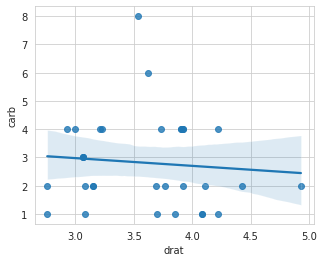

In [ ]:
sns.regplot(x = 'drat', y = 'carb', data=carros, scatter=True)
# Sim, são categóricas, pois possuem um conjunto limitado de opções

### Checando se são variáveis independentes
(se atendem aos pressupostos)
Utilizando o coeficiente de spearman

In [ ]:
drat = carros['drat']
carb = carros['carb']

spearman, p = spearmanr(drat, carb)
print(spearman) # resultado próximo de zero indica variaveis independentes

-0.1252229399201802


### Conferindo se contém valores em branco/nulo

In [ ]:
carros.isnull().sum()

car_names    0
mpg          0
cyl          0
disp         0
hp           0
drat         0
wt           0
qsec         0
vs           0
am           0
gear         0
carb         0
dtype: int64

### Conferindo se o target é binário ou ordinal
usando plot do seaborn

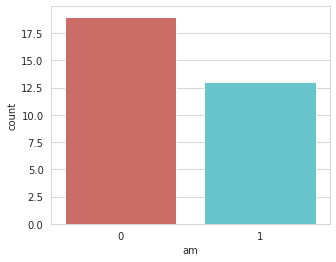

In [ ]:
sns.countplot(x='am', data=carros, palette='hls')

### Conferindo se o dado é grande o suficiente

In [ ]:
carros.info() #

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   car_names  32 non-null     object 
 1   mpg        32 non-null     float64
 2   cyl        32 non-null     int64  
 3   disp       32 non-null     float64
 4   hp         32 non-null     int64  
 5   drat       32 non-null     float64
 6   wt         32 non-null     float64
 7   qsec       32 non-null     float64
 8   vs         32 non-null     int64  
 9   am         32 non-null     int64  
 10  gear       32 non-null     int64  
 11  carb       32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


### Deployng and evaluating your model

In [ ]:
x = scale(carros_dados)

In [ ]:
reg_log = LogisticRegression().fit(x, y)
print(reg_log.score(x, y)) #quanto mais próximo de 1 melhor

0.8125


In [ ]:
y_predito = reg_log.predict(x)
print(classification_report(y, y_predito))

              precision    recall  f1-score   support

           0       0.88      0.79      0.83        19
           1       0.73      0.85      0.79        13

    accuracy                           0.81        32
   macro avg       0.81      0.82      0.81        32
weighted avg       0.82      0.81      0.81        32



## Naive Bayes

Utilizado para predizer quais as chances de um evento acontecer, com base nos seus dados atuais. É um método de machine learning que pode ser usado apra predizer a chance de um evento ocorrer, baseando-se nas evidências presentes nos seus dados.

Probabilidade condicional:
` P(B|A) = (P(A and B))/(P(A)) `

Tipos de modelos de Naive Bayes
- Multinomial: ótimo para quando as variáveis (categóricas ou contínuas) descrevem frequências discretas (ex.: contagem de palavras)
- Bernoulli: ótimo para fazer predições de variáveis binárias
- Gaussiano: ótimo para fazer predições de variáveis com distribuição normal

Casos de uso
- Detecção de spam
- Classificação de usuários
- Predição de risco de crédito
- Predição de risco à saúde

Pressupostos
- Preditores são independentes
- Conhecimento a priori: pressupõe-se que as condições do passado ainda são válidas. Quando fizermos predições baseadas em valores históricos, teremos resultados incorretos se as condições tiverem mudado.
- Todos os modelos de regressão também mantêm um pressuposto a priori

### Aplicando um modelo de código
aplicando um modelo bayesiano para identificar spam

importando dados:


In [1]:
import numpy as np

import urllib

import sklearn
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data'
ur = 
raw_data = urllib.request.urlopen(url)
dados = np.loadtxt(raw_data, delimiter=',')
print(dados[0])

[  0.      0.64    0.64    0.      0.32    0.      0.      0.      0.
   0.      0.      0.64    0.      0.      0.      0.32    0.      1.29
   1.93    0.      0.96    0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.778   0.      0.
   3.756  61.    278.      1.   ]


### Naive Bayes

In [2]:
x = dados[:, :48]

y = dados[:, -1]

In [3]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=.33, random_state=17)

In [5]:
GaussNB = GaussianNB().fit(x_treino, y_treino)
print((GaussNB))

y_predito = GaussNB.predict(x_teste)
print(accuracy_score(y_teste, y_predito))

GaussianNB()
0.8130348913759052


In [7]:
MultNB = MultinomialNB().fit(x_treino, y_treino)
print(MultNB)

y_predito = MultNB.predict(x_teste)
print(accuracy_score(y_teste, y_predito))

MultinomialNB()
0.8736010533245556


In [8]:
BernNB = BernoulliNB(binarize=True).fit(x_treino, y_treino)
print(BernNB)

y_predito = BernNB.predict(x_teste)
print(accuracy_score(y_teste, y_predito))

BernoulliNB(binarize=True)
0.8558262014483212


In [9]:
BernNB = BernoulliNB(binarize=.1).fit(x_treino, y_treino)
print(BernNB)

y_predito = BernNB.predict(x_teste)
print(accuracy_score(y_teste, y_predito))
#com bernoulli p score é melhor, depois de configurado o binarize

BernoulliNB(binarize=0.1)
0.8953258722843976
